In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load data
rf = pd.read_csv("/Users/arsenpankiv/Desktop/Python_practice/small_dataset.csv")

# Clean data
rf["date"] = pd.to_datetime(rf["date"])
rf["skills_list"] = rf["skills_list"].apply(
    lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills
)

# create a copy and remove rows with missing values
ng_frame = rf.copy()
ng_frame = ng_frame.dropna(subset="mean_salary")

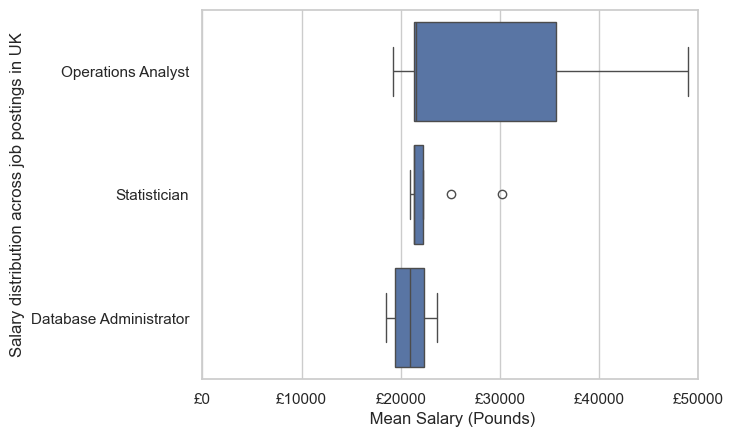

Index(['Operations Analyst', 'Statistician', 'Database Administrator'], dtype='object', name='job_title')

In [21]:
job_titles2 = ng_frame["job_title"].value_counts().index.to_list()
titles_frame = ng_frame[ng_frame["job_title"].isin(job_titles2)]

# let's strusture the graph in the descending order 

pivot_table = titles_frame.pivot_table(index="job_title", values="mean_salary", aggfunc="median")
pivot_sorted = pivot_table.sort_values(by="mean_salary",ascending=False)
# let's now take out index
pivot_index = pivot_sorted.index

import seaborn as sns

# order parameter will help to organize in the way we want it 
sns.boxplot(data=titles_frame, y="job_title",x="mean_salary", order=pivot_index)
sns.set_theme(style="whitegrid")

plt.xlabel(" Mean Salary (Pounds)")
plt.ylabel("Salary distribution across job postings in UK")
plt.xlim(0,50000)


plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"£{x:.0f}"))
plt.show()

pivot_index